In [205]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import f
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

In [195]:
Cust=pd.read_csv('Wholesale+Customers+Data.csv')
Cust.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [3]:
Cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [4]:
Cust.isnull().values.any()

False

In [5]:
Cust.dtypes

Buyer/Spender        int64
Channel             object
Region              object
Fresh                int64
Milk                 int64
Grocery              int64
Frozen               int64
Detergents_Paper     int64
Delicatessen         int64
dtype: object

In [6]:
CustN=Cust.drop('Buyer/Spender', 1)
CustN.groupby(['Region','Channel']).sum()

C:\Users\Dell\AppData\Local\Temp/ipykernel_19844/3887456162.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  CustN=Cust.drop('Buyer/Spender', 1)


Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Region Channel                                                        
Lisbon Hotel     761233   228342   237542  184512             56081   
       Retail     93600   194112   332495   46514            148055   
Oporto Hotel     326215    64519   123074  160861             13516   
       Retail    138506   174625   310200   29271            159795   
Other  Hotel    2928269   735753   820101  771606            165990   
       Retail   1032308  1153006  1675150  158886            724420   

                Delicatessen  
Region Channel                
Lisbon Hotel           70632  
       Retail          33695  
Oporto Hotel           30965  
       Retail          23541  
Other  Hotel          320358  
       Retail         191752

# 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least

In [7]:
Total_by_Region=CustN.groupby(['Region']).sum().T
Total_by_Region.sum()

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
dtype: int64

In [8]:
Total_by_Channel=CustN.groupby(['Channel']).sum().T
Total_by_Channel.sum()

Channel
Hotel     7999569
Retail    6619931
dtype: int64

In [9]:
Total=CustN.sum()
Total.drop(['Channel', 'Region'], inplace=True)
Total


Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
Delicatessen         670943
dtype: object

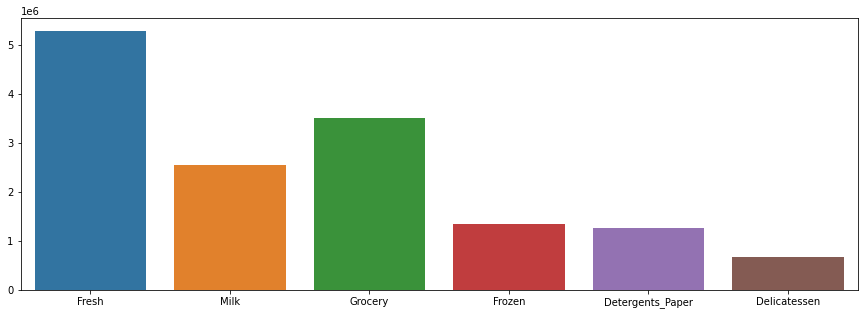

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x=Total.index,y=Total.values);

In [11]:
Cust_Spend = CustN.copy(deep=False)
Cust_Spend['Spending'] =Cust_Spend['Fresh']+Cust_Spend['Milk']+Cust_Spend['Grocery']+Cust_Spend['Frozen']+Cust_Spend['Detergents_Paper']+Cust_Spend['Delicatessen']
Cust_Spend.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spending
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [12]:
Cust_Spend.groupby(['Region','Channel'])['Spending'].sum()

Region  Channel
Lisbon  Hotel      1538342
        Retail      848471
Oporto  Hotel       719150
        Retail      835938
Other   Hotel      5742077
        Retail     4935522
Name: Spending, dtype: int64

In [13]:
CustN['Channel'].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [14]:
CustN['Region'].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [15]:
df_channel = CustN.drop(columns=['Region'])
mean1 = df_channel.groupby('Channel').mean()
mean1.round(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,13475.56,3451.72,3962.14,3748.25,790.56,1415.96
Retail,8904.32,10716.50,16322.85,1652.61,7269.51,1753.44


In [16]:
df_region = CustN.drop(columns=['Channel'])
mean2 = df_region.groupby('Region').mean()
mean2.round(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,11101.73,5486.42,7403.08,3000.34,2651.12,1354.9
Oporto,9887.68,5088.17,9218.60,4045.36,3687.47,1159.7
Other,12533.47,5977.09,7896.36,2944.59,2817.75,1620.6


# 1.2  There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [17]:
Details=CustN.describe().T
Details['IQR']=Details['75%']-Details['25%']
Details

,count,mean,std,min,25%,50%,75%,max,IQR
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,13806.00
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,5657.25
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,8502.75
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,2812.00
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,3665.25
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,1412.00


In [27]:
Details=CustN.describe(include='all').T
Details['IQR']=Details['75%']-Details['25%']
Details

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,IQR
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,13806.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0,5657.25
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0,8502.75
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,2812.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0,3665.25
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,1412.0


In [ ]:
# Here we see behaviour in all items across Channel and Region use Bar Plot.They are different in Channel and Region.

Text(0.5, 1.0, 'Item - Fresh')

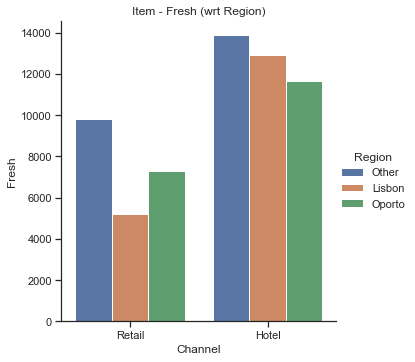

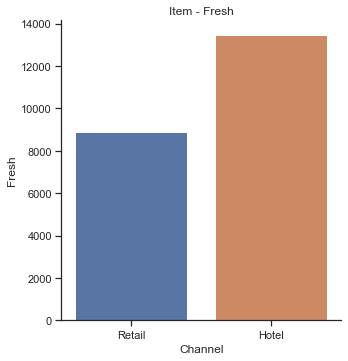

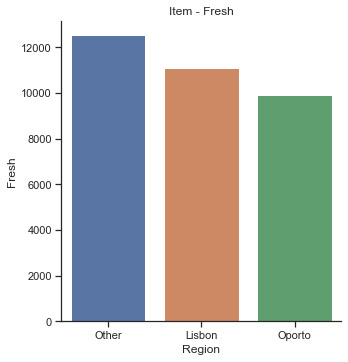

In [34]:

sns.catplot(x="Channel", y="Fresh", hue ="Region", kind="bar", ci=None, data=CustN)
plt.title('Item - Fresh (wrt Region)')

sns.catplot(x="Channel", y="Fresh", kind="bar", ci=None, data=CustN)
plt.title('Item - Fresh')

sns.catplot(x="Region", y="Fresh", kind="bar", ci=None, data=CustN)
plt.title('Item - Fresh')


Text(0.5, 1.0, 'Item - Milk')

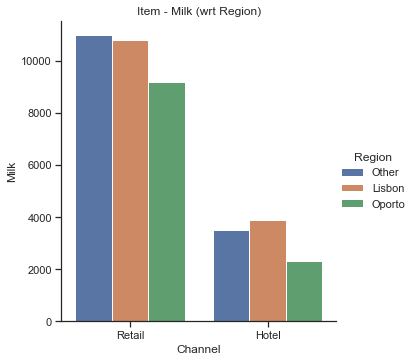

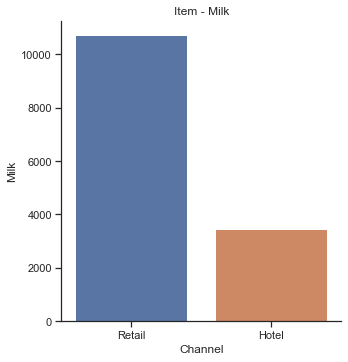

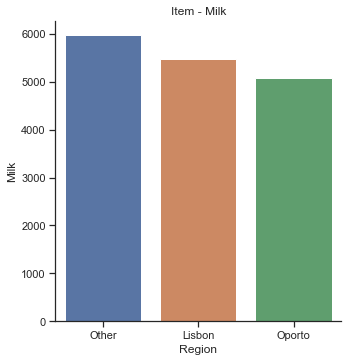

In [35]:
sns.catplot(x="Channel", y="Milk", hue ="Region", kind="bar", ci=None, data=CustN)
plt.title('Item - Milk (wrt Region)')

sns.catplot(x="Channel", y="Milk", kind="bar", ci=None, data=CustN)
plt.title('Item - Milk')

sns.catplot(x="Region", y="Milk", kind="bar", ci=None, data=CustN)
plt.title('Item - Milk')


Text(0.5, 1.0, 'Item - Grocery')

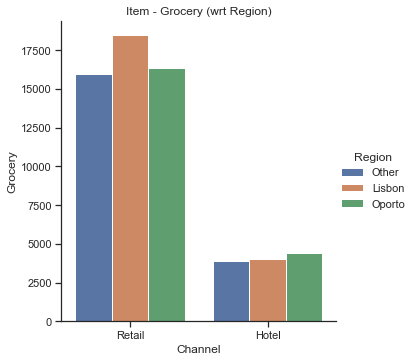

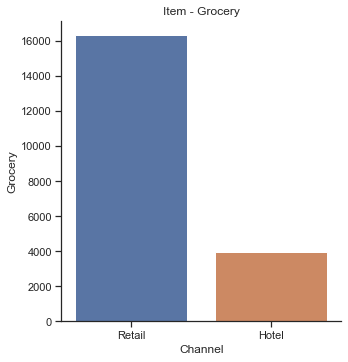

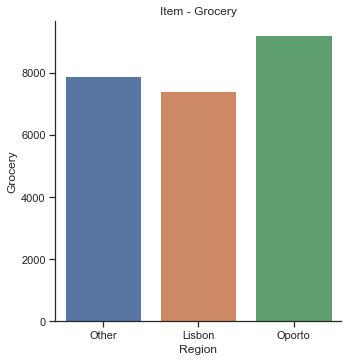

In [37]:
sns.catplot(x="Channel", y="Grocery", hue ="Region", kind="bar", ci=None, data=CustN)
plt.title('Item - Grocery (wrt Region)')

sns.catplot(x="Channel", y="Grocery", kind="bar", ci=None, data=CustN)
plt.title('Item - Grocery')

sns.catplot(x="Region", y="Grocery", kind="bar", ci=None, data=CustN)
plt.title('Item - Grocery')

Text(0.5, 1.0, 'Item - Frozen')

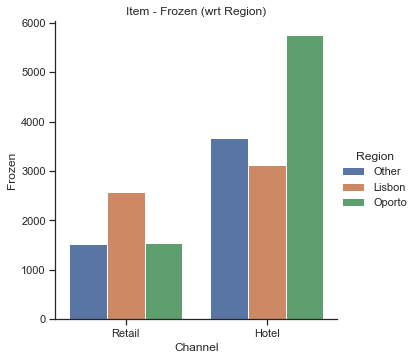

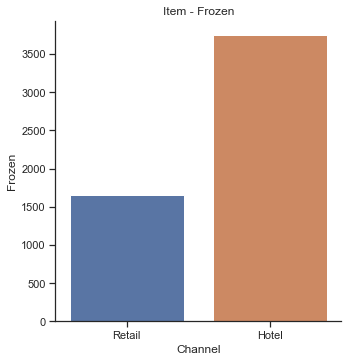

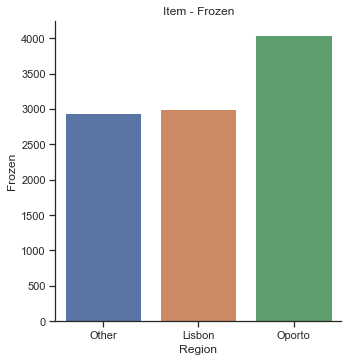

In [39]:
sns.catplot(x="Channel", y="Frozen", hue ="Region", kind="bar", ci=None, data=CustN)
plt.title('Item - Frozen (wrt Region)')

sns.catplot(x="Channel", y="Frozen", kind="bar", ci=None, data=CustN)
plt.title('Item - Frozen')

sns.catplot(x="Region", y="Frozen", kind="bar", ci=None, data=CustN)
plt.title('Item - Frozen')

Text(0.5, 1.0, 'Item - Detergents_Paper')

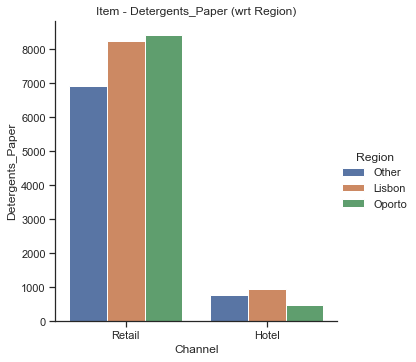

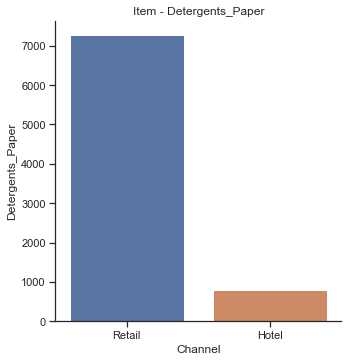

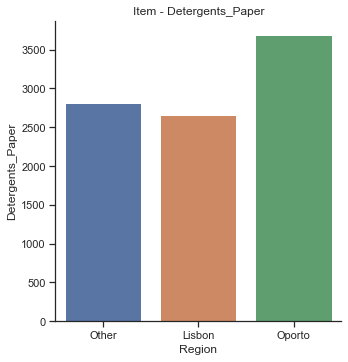

In [41]:
sns.catplot(x="Channel", y="Detergents_Paper", hue ="Region", kind="bar", ci=None, data=CustN)
plt.title('Item - Detergents_Paper (wrt Region)')

sns.catplot(x="Channel", y="Detergents_Paper", kind="bar", ci=None, data=CustN)
plt.title('Item - Detergents_Paper')

sns.catplot(x="Region", y="Detergents_Paper", kind="bar", ci=None, data=CustN)
plt.title('Item - Detergents_Paper')

Text(0.5, 1.0, 'Item - Delicatessen')

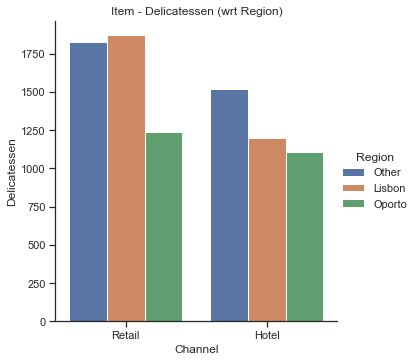

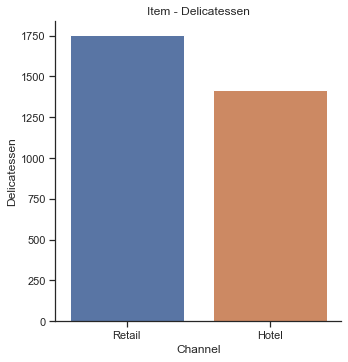

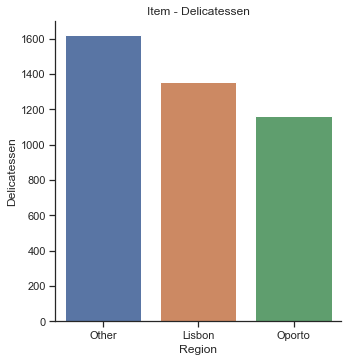

In [43]:
sns.catplot(x="Channel", y="Delicatessen", hue ="Region", kind="bar", ci=None, data=CustN)
plt.title('Item - Delicatessen (wrt Region)')

sns.catplot(x="Channel", y="Delicatessen", kind="bar", ci=None, data=CustN)
plt.title('Item - Delicatessen')

sns.catplot(x="Region", y="Delicatessen", kind="bar", ci=None, data=CustN)
plt.title('Item - Delicatessen')

# Q 1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behavior? Which items shows the least inconsistent behavior?

In [48]:
products = CustN[CustN.columns[+2:CustN.columns.size]]
standard_deviation_items = products.std()
standard_deviation_items.round(3)

Fresh               12647.329
Milk                 7380.377
Grocery              9503.163
Frozen               4854.673
Detergents_Paper     4767.854
Delicatessen         2820.106
dtype: float64

In [65]:
Details_N=CustN.describe().T
Details_N['CV'] =Details_N['std']/Details_N['mean']
Details_N

,count,mean,std,min,25%,50%,75%,max,CV
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,1.053918
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,1.273299
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,1.195174
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,1.580332
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,1.654647
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,1.849407


In [68]:
Details_N.CV

Fresh               1.053918
Milk                1.273299
Grocery             1.195174
Frozen              1.580332
Detergents_Paper    1.654647
Delicatessen        1.849407
Name: CV, dtype: float64

In [70]:
#Fresh item have lowest coefficient of Variation So that is consistent.
#Delicatessen item have highest coefficient of Variation, So that is Inconsistent.

# Q 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

<AxesSubplot:>

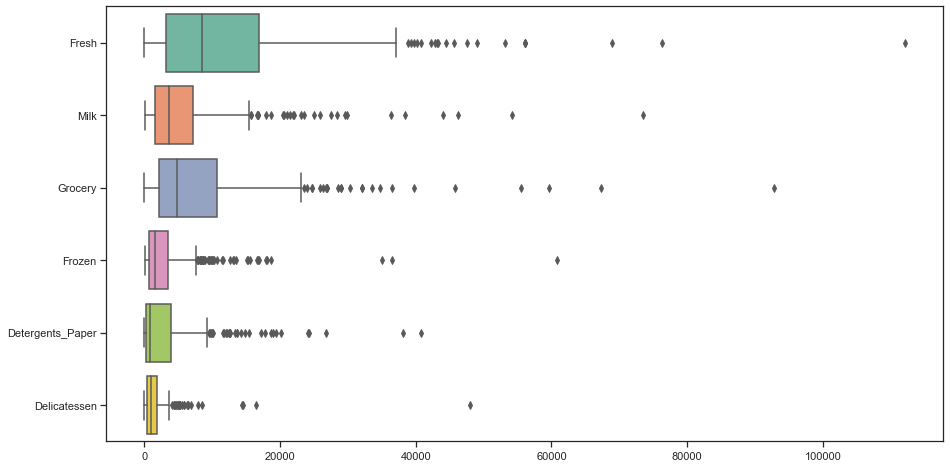

In [71]:
plt.figure(figsize=(15,8))
sns.boxplot(data=products, orient="h", palette="Set2")

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-p

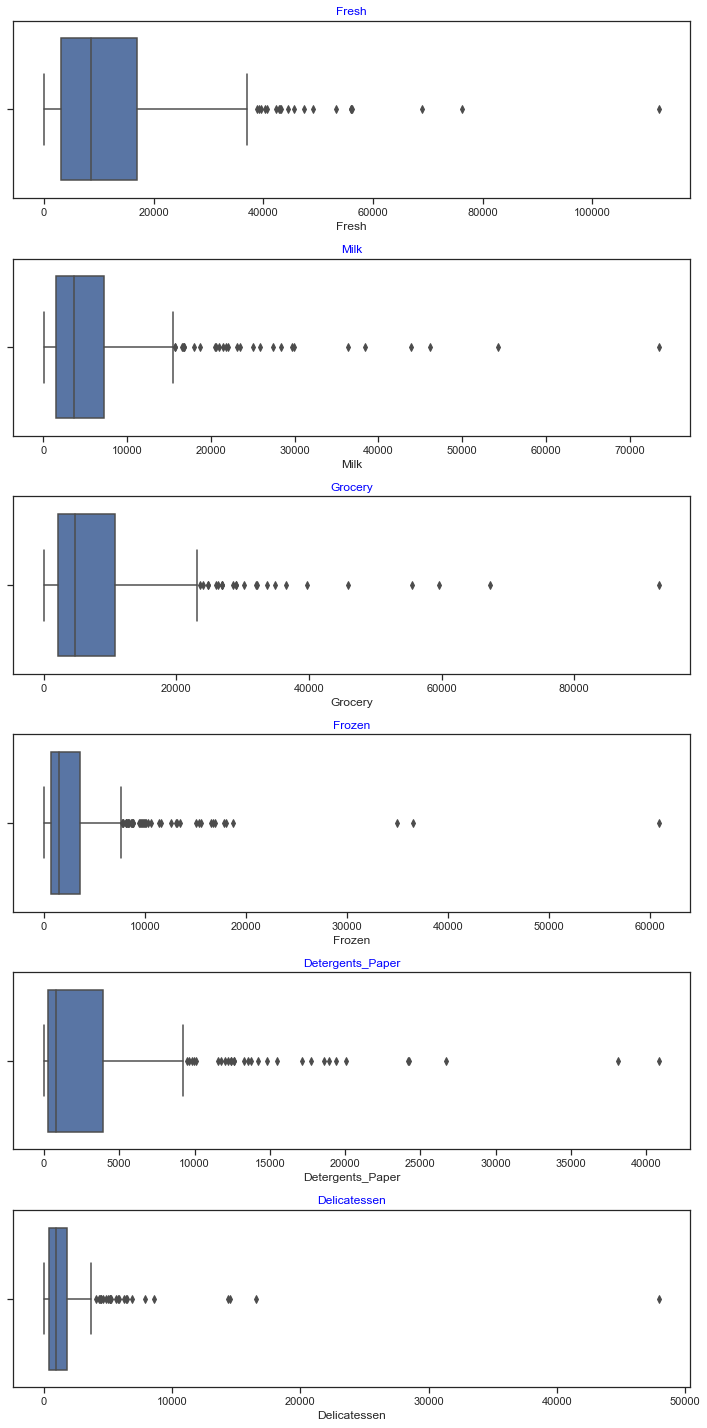

In [72]:
data_plot=CustN[CustN.dtypes[CustN.dtypes!='object'].index]
fig=plt.figure(figsize=(10,20))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(6,1,i+1)
   sns.boxplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

We could see that there are outliers in all the items across the product range. i.e. All the products data are having outliers. Perhaps the most common or familiar type of outlier is the observations that are far from the rest of the observations or the center of mass of observations. Removing outliers from data prior to modeling can result in a better fit of the data and, in turn, more skillful predictions

# Q 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective.

From this analysis I found out that:
1. There are inconsistencies in spending of different items by calculating CV.
2. The spending of Hotel and Retail channel are different which can be equal.
3. Also the spend can be equal for different Regions if business team focus on other items than 'Fresh' and 'Grocery'.
4. Since the Delicatessen show the least inconsistent behavior, the business should invest more in this food item because it is less risky
5. Fresh products require more spending, to cut cost the wholesale distributor can concentrate more on other food items like Milk, Grocery, Frozen, Detergent paper and Delicatessen


 PROBLEM 2:


The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates

# 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major

2.1.2. Gender and Grad Intention

2.1.3. Gender and Employment

2.1.4. Gender and Computer

In [74]:
Stud=pd.read_csv('Survey-1.csv')
Stud.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [77]:
#2.2.1 Gender and Major
pd.crosstab(index=Stud['Gender'],columns=Stud['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [81]:
#2.1.2. Gender and Grad Intention
pd.crosstab(index=Stud['Gender'],columns=Stud['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [85]:
#2.1.3. Gender and Employment
pd.crosstab(index=Stud['Gender'],columns=Stud['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [87]:
#2.1.4. Gender and Computer
pd.crosstab(index=Stud['Gender'],columns=Stud['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [102]:
#2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
#2.2.1. What is the probability that a randomly selected CMSU student will be male?
#here total 62 lines of data,
#2.2.2. What is the probability that a randomly selected CMSU student will be female?
n=62


In [91]:
Stud.groupby('Gender').size()

Gender
Female    33
Male      29
dtype: int64

In [99]:
mp=29/n
mp

0.46774193548387094

The chances of male being randomly selected is 46.77%

In [100]:
fp=33/n
fp

0.532258064516129

The chances of female being randomly selected is 53.22%

In [103]:
#2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

#2.3.1. Find the conditional probability of different majors among the male students in CMSU.
#2.3.2 Find the conditional probability of different majors among the female students of CMSU.


In [108]:
Major_Prob=pd.crosstab(index=Stud['Gender'],columns=Stud['Major']).T
Major_Prob

Gender,Female,Male
Major,,
Accounting,3,4
CIS,3,1
Economics/Finance,7,4
International Business,4,2
Management,4,6
Other,3,4
Retailing/Marketing,9,5
Undecided,0,3


There are total 29 male students and 33 female students.

In [115]:
Major_Prob['Female_percentage']=(Major_Prob['Female']/33)*100
Major_Prob['Male_percentage']=(Major_Prob['Male']/29)*100
Major_Prob

Gender,Female,Male,Male_percentage,Female_percentage
Major,,,,
Accounting,3,4,13.793103,9.090909
CIS,3,1,3.448276,9.090909
Economics/Finance,7,4,13.793103,21.212121
International Business,4,2,6.896552,12.121212
Management,4,6,20.689655,12.121212
Other,3,4,13.793103,9.090909
Retailing/Marketing,9,5,17.241379,27.272727
Undecided,0,3,10.344828,0.000000


In [116]:
#2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:
#2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.
#2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

probability That a randomly chosen student is a male and intends to graduate = number of male students who intends to graduate/total number of students=17/62

In [118]:
17/62

0.27419354838709675

probability that a randomly selected student is a female and does NOT have a laptop = number of female students without laptop/total number of students=4/62

In [120]:
4/62

0.06451612903225806

In [121]:
#2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
#2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?
#2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [126]:
pd.crosstab(index=Stud['Gender'],columns=Stud['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [128]:
#student is a male or has full-time employment is 29+3=32
#then the probability is 32/62
32/62*100

51.61290322580645

conditional probability that given a female student is randomly chosen, she is majoring in international business or management= number of female student from international business or management/total number of female students=8/33

In [130]:
8/33*100

24.242424242424242

In [131]:
#2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?

In [138]:
grad=pd.crosstab(index=Stud['Gender'],columns=Stud['Grad Intention'])
grad.drop('Undecided', 1)

C:\Users\Dell\AppData\Local\Temp/ipykernel_19844/2183851366.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  grad.drop('Undecided', 1)


Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [139]:
32/62
#P(female)

0.5161290322580645

In [142]:
28/62
#P(intent to graduate) 

0.45161290322580644

In [143]:
11/62
#P(female & intent to graduate) 

0.1774193548387097

In [149]:
0.53*0.45
#P(female) * P(intent to graduate) 

0.23850000000000002

In [150]:
#2.7 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. Answer the following questions based on the data.

#2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?
#2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.


In [148]:
Stud.groupby('GPA').size()

GPA
2.3    1
2.4    1
2.5    6
2.6    2
2.8    3
2.9    4
3.0    7
3.1    7
3.2    6
3.3    5
3.4    7
3.5    6
3.6    3
3.7    2
3.8    1
3.9    1
dtype: int64

We could see there are 17students with less than 3 GPA

In [152]:
17/62*100

27.419354838709676

In [153]:
#Probability that a randomly selected male earns more than 50 = number male students who earns 50 or more/total number of male=14/29

In [155]:
14/29

0.4827586206896552

In [156]:
#Probability that a randomly selected Female earns more than 50 = number of females earning 50 or more/number of females=18/33

In [157]:
18/33

0.5454545454545454

In [158]:
#2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GPA'>

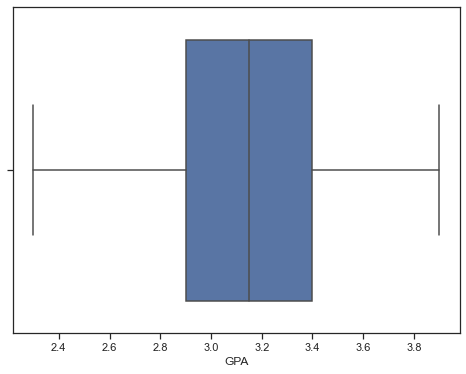

In [165]:
plt.figure(figsize=(8,6))
sns.boxplot(Stud["GPA"])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

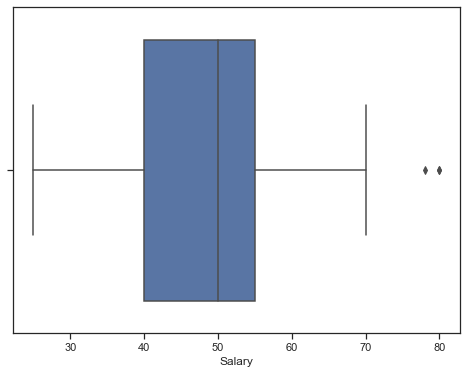

In [167]:
plt.figure(figsize=(8,6))
sns.boxplot(Stud["Salary"])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending'>

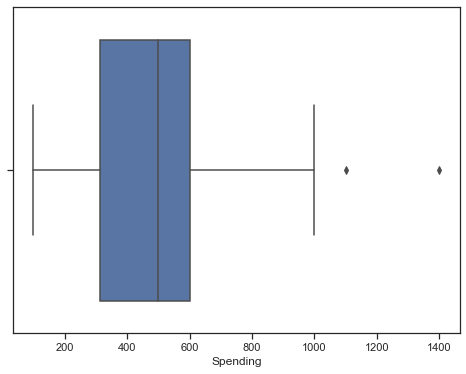

In [169]:
plt.figure(figsize=(8,6))
sns.boxplot(Stud["Spending"])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Text Messages'>

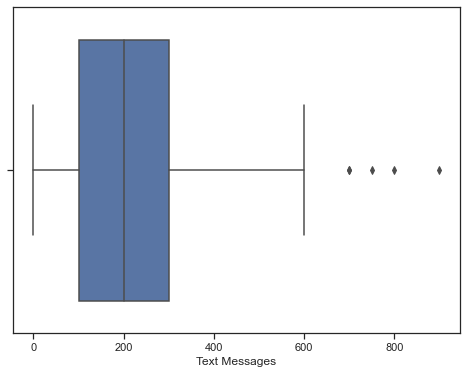

In [171]:
plt.figure(figsize=(8,6))
sns.boxplot(Stud["Text Messages"])

In [179]:
#GPA
print(stats.shapiro(Stud['GPA']))

ShapiroResult(statistic=0.9685361981391907, pvalue=0.11204058676958084)


In [182]:
#Salary
print(stats.shapiro(Stud['Salary']))

ShapiroResult(statistic=0.9565856456756592, pvalue=0.028000956401228905)


In [183]:
#Spending
print(stats.shapiro(Stud['Spending']))

ShapiroResult(statistic=0.8777452111244202, pvalue=1.6854661225806922e-05)


In [187]:
#Text Messages
print(stats.shapiro(Stud['Text Messages']))

ShapiroResult(statistic=0.8594191074371338, pvalue=4.324040673964191e-06)


Only GPA data is normally distributed (Reffered the p-values)

In [186]:
#3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

#3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [202]:
ab=pd.read_csv('A+&+B+shingles.csv')
ab.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [203]:

a=36
b=31
#less than 0.35

In [204]:
#Ho: mu >=0.35
#H1: mi<0.35
#aplha=0.05

In [226]:
#For A,
t_statistic,p_value=ttest_1samp(ab.A,0.35)

#The following is the pvalue for a one-tailed test.
print ('The T statistic is:',t_statistic,'\n''The corresponding pvalue is :',(p_value/2))

The T statistic is: -1.4735046253382782 
The corresponding pvalue is : 0.07477633144907513


As the p-value > alpha, do not reject H0;

In [225]:
#For B,
t_statistic,p_value=ttest_1samp(ab.B,0.35,nan_policy='omit')
print ('The T statistic is:',t_statistic,'\n''The corresponding pvalue is :',(p_value/2))

The T statistic is: -3.1003313069986995 
The corresponding pvalue is : 0.0020904774003191826


As the p-value < alpha, reject H0;

In [218]:
#3.2

In [219]:
#Ho: mu(A)=mu(B)
#Ha: mu(A)!=mu(B)
alpha=0.05

In [222]:
t_statistic,p_value=ttest_ind(ab['A'],ab['B'],equal_var=True, nan_policy='omit')
print ('The T statistic is:',t_statistic,'\n''The corresponding pvalue is :',p_value)

The T statistic is: 1.2896282719661123 
The corresponding pvalue is : 0.2017496571835306


As the p-value > alpha, do not reject H0;

In [227]:
#END